# **Case Study: Bellabeat**

## **About the company**

Bellabeat is high-tech company that manufactures health-focused smart products. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website.

## **Business Task**

To gain insight into how consumers use non-Bellabeat smart devices. Then, apply the insight information to help influence Bellabeat marketing strategy.

## **Questions**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## **Limitation of the data**

1. We do not know the gender of the users as the company mainly focuses on women. Hence, the results might not represent Bellabeat's customers.
2. There are only about 30 samples. Even 30 are the minimum sample, the company is in the global market. So, the result might not be as accurate as it should have been with more samples.  

## **Analysis Process**

### **Preparing Data**

First, I start with preparing the environment by installing and opening the packages.

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(readr)
library(readxl)
library(dplyr)
library(skimr)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Then, import the data that will be used in this analysis. 

In [2]:
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

Pre-view the data

In [3]:
head(activity)
head(sleep)
head(hourly_steps)
head(weight)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Check the numbers of the columns to make sure we have enough data for the analysis. 

There are not enough data on the data weight.csv, so I will not use it for the analysis. 

In [4]:
n_distinct(activity$Id)
n_distinct(sleep$Id)
n_distinct(hourly_steps$Id)
n_distinct(weight$Id)

[1] 33

[1] 24

[1] 33

[1] 8

### **Cleaning Data**

After the pre-screen data, I start the cleaning process by cleaning duplicates.

In [5]:
unique(sleep)
unique(hourly_steps)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


Then, check the types of data to make sure it is consistent. In this process, I focus on the date column of each dataset as I have already pre-screened the data via Excel.

In [6]:
class(activity$ActivityDate)
class(sleep$SleepDay)
class(hourly_steps$ActivityHour)

[1] "character"

[1] "character"

[1] "character"

The date data is stored as a 'character', so it has to be converted into the date type.

In [7]:
# activity
activity$ActivityDate <- as.Date(activity$ActivityDate, "%m/%d/%Y")

# sleep
sleep$SleepDay <- as.Date(sleep$SleepDay, format = "%m/%d/%Y")

# hourly_steps
# I separate the date and time before converting the data type. I keep the original column 'ActivityHour' as if there is any issue late on, I still have a back-up for this column.
# First, create a new column for the date.

hourly_steps$date <- as.Date(hourly_steps$ActivityHour, format = "%m/%d/%Y")
class(hourly_steps$date)

# Second, create a new column for the time. 
hourly_steps$ActivityHour <- as.POSIXct(hourly_steps$ActivityHour, tz = "UTC", format = "%m/%d/%Y %I:%M:%S %p")
hourly_steps$time <- as.POSIXlt(hourly_steps$ActivityHour, tz = "UTC", format = "%H:%M:%S")
hourly_steps$time <- format(as.POSIXct(hourly_steps$time), format = "%H:%M:%S")

[1] "Date"

To make the column names consistent, I convert them into lowercase.

In [8]:
activity <- rename_with(activity, tolower)
sleep <- rename_with(sleep, tolower)
hourly_steps <- rename_with(hourly_steps, tolower)

### **Exploring Data**

In [9]:
# activity
activity %>% select(totalsteps, totaldistance, veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes, calories) %>% 
  summary()

# sleep
sleep %>% distinct() %>% 
  mutate(totalminutesasleep, totalhoursasleep = round(totalminutesasleep / 60, 2))%>% 
  select(totalminutesasleep, totalhoursasleep) %>% 
  summary()

   totalsteps    totaldistance    veryactiveminutes fairlyactiveminutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 7406   Median : 5.245   Median :  4.00    Median :  6.00     
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   : 13.56     
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.: 19.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 lightlyactiveminutes sedentaryminutes    calories   
 Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:127.0        1st Qu.: 729.8   1st Qu.:1828  
 Median :199.0        Median :1057.5   Median :2134  
 Mean   :192.8        Mean   : 991.2   Mean   :2304  
 3rd Qu.:264.0        3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :518.0        Max.   :1440.0   Max.   :4900  

 totalminutesasleep totalhoursasleep
 Min.   : 58.0      Min.   : 0.970  
 1st Qu.:361.0      1st Qu.: 6.020  
 Median :432.5      Median : 7.210  
 Mean   :419.2      Mean   : 6.987  
 3rd Qu.:490.0      3rd Qu.: 8.170  
 Max.   :796.0      Max.   :13.270  

### **Key Statistic Findings**

1. The average steps of the users are 7,638 steps per day which are considered lower than the CDC's recommendation. The CDC study shows that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Also, taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. You can find more details of the study. [here](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html)

2. The average sedentary minutes are 991 minutes per day (about 16.5 hours) which is significantly higher than other active activities.

3. Considering the active activity types, the users spend more time on lightly active activity, which is about 193 minutes daily (3.2 hours).  

3. The average hours asleep is about 7 hours, and the minimum hours CDC recommends an adult to sleep. For more information. [here](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html)

To expand the scope of the analysis, I merge the activity and sleep data into one dataframe 'activity_sleep'. These 2 data sets are joint by the columns 'id' and 'date'. 

In [10]:
activity_sleep <- merge(x= activity, y = sleep, by.x = c("id", "activitydate"), by.y = c("id", "sleepday"))

# Preview the new data
head(activity_sleep)
n_distinct(activity_sleep$id)
colnames(activity_sleep)

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


[1] 24

[1] "id"                       "activitydate"            
 [3] "totalsteps"               "totaldistance"           
 [5] "trackerdistance"          "loggedactivitiesdistance"
 [7] "veryactivedistance"       "moderatelyactivedistance"
 [9] "lightactivedistance"      "sedentaryactivedistance" 
[11] "veryactiveminutes"        "fairlyactiveminutes"     
[13] "lightlyactiveminutes"     "sedentaryminutes"        
[15] "calories"                 "totalsleeprecords"       
[17] "totalminutesasleep"       "totaltimeinbed"

Then, assign the days of the week into the new dataframe 'activity_sleep' and the data 'hourly_steps' and set the level to Monday - Tuesday - Wednesday - Thursday - Friday - Saturday - Sunday. 

In [11]:
activity_sleep$dayofweek <- weekdays(activity_sleep$activitydate)

hourly_steps$dayofweek <- weekdays(hourly_steps$date)

activity_sleep$dayofweek <- factor(activity_sleep$dayofweek, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

hourly_steps$dayofweek <- factor(hourly_steps$dayofweek, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

Explore the new dataframe by grouping it by each day of the week.

In [12]:
activity_sleep %>% distinct() %>%  
  drop_na() %>% 
  group_by(dayofweek) %>% 
  mutate(totalminutesasleep, totalhoursasleep = round(totalminutesasleep / 60, 2))%>%
  summarise(mean_totalsteps = mean(totalsteps), mean_veryactiveminutes = mean(veryactiveminutes),
            mean_fairlyactiveminutes = mean(fairlyactiveminutes), mean_lightlyactiveminutes = mean(lightlyactiveminutes),
            mean_sedentaryminutes = mean(sedentaryminutes), mean_totalminutesasleep = mean(totalminutesasleep), 
            mean_totalhoursasleep = mean(totalhoursasleep)) 

dayofweek,mean_totalsteps,mean_veryactiveminutes,mean_fairlyactiveminutes,mean_lightlyactiveminutes,mean_sedentaryminutes,mean_totalminutesasleep,mean_totalhoursasleep
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,9273.217,30.71739,19.08696,222.3696,718.4130,419.5000,6.992391
Tuesday,9182.692,30.61538,20.04615,216.5846,740.0462,404.5385,6.742615
Wednesday,8022.864,21.33333,16.74242,207.9697,714.4545,434.6818,7.245606
Thursday,8183.516,22.85938,15.85938,202.9375,698.3750,401.2969,6.688438
Friday,7901.404,21.15789,14.57895,222.6842,743.0877,405.4211,6.757368
Saturday,9871.123,27.56140,22.71930,246.7719,680.4386,419.0702,6.985088
Sunday,7297.855,22.14545,16.76364,200.0364,687.6364,452.7455,7.546545


### **Key Statistic Findings**

1. Consider the average total steps, the users are the most active on Saturday (the average steps are 9,871 steps). However, in terms of the active minutes, the data shows that the users spend the longest time on 'very active' activity on Monday (about 30 minutes). 

2. The users sleep the longest on Sunday, which is about 7.5 hours. However, the average hours asleep on the other days are not significantly lower. The gap is between 6.9 hours and 7.5 hours each day. This means the users seem to have enough sleep every day. 

### **Visualisation**

First, I would like to find out the correlation between the variables. This analysis focuses on 2 correlations: the correlation between sleep and sedentary, and the correlation between calories and sleep.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


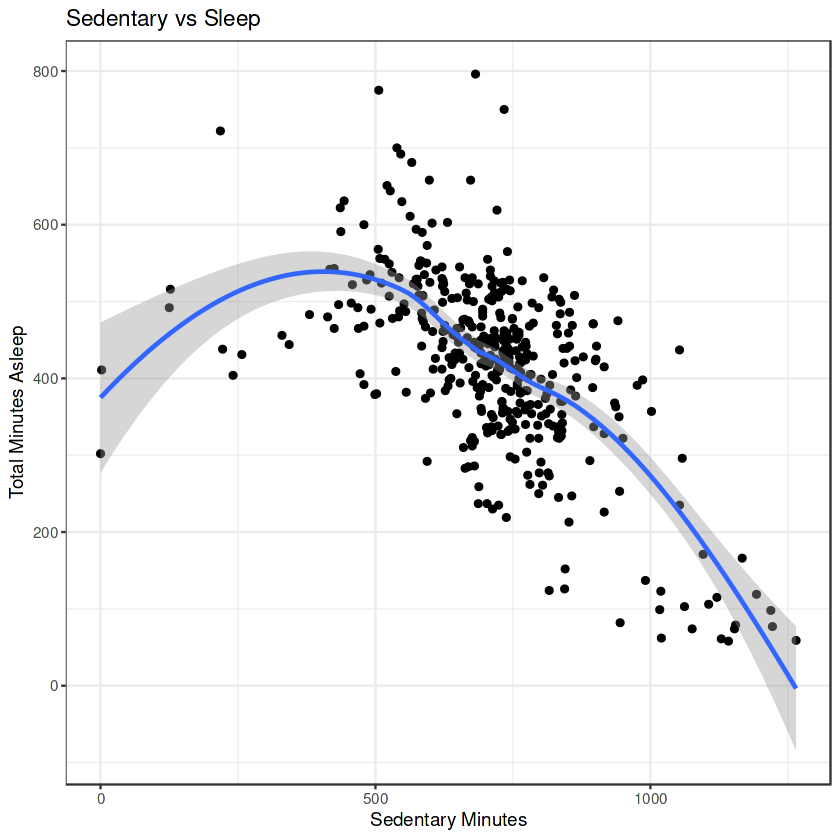

In [13]:
## The correlation between sleep and sedentary.
activity_sleep %>% drop_na() %>% 
  ggplot(aes(x = sedentaryminutes, y = totalminutesasleep)) +
  geom_point()+
  geom_smooth() +
  labs(title = "Sedentary vs Sleep", 
       x = "Sedentary Minutes",
       y = "Total Minutes Asleep") +
  theme_bw()

This graph shows that the longer sedentary minutes the users spend, the less asleep time they have. The company can encourage users to be more active during the day as it will improve their sleep. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


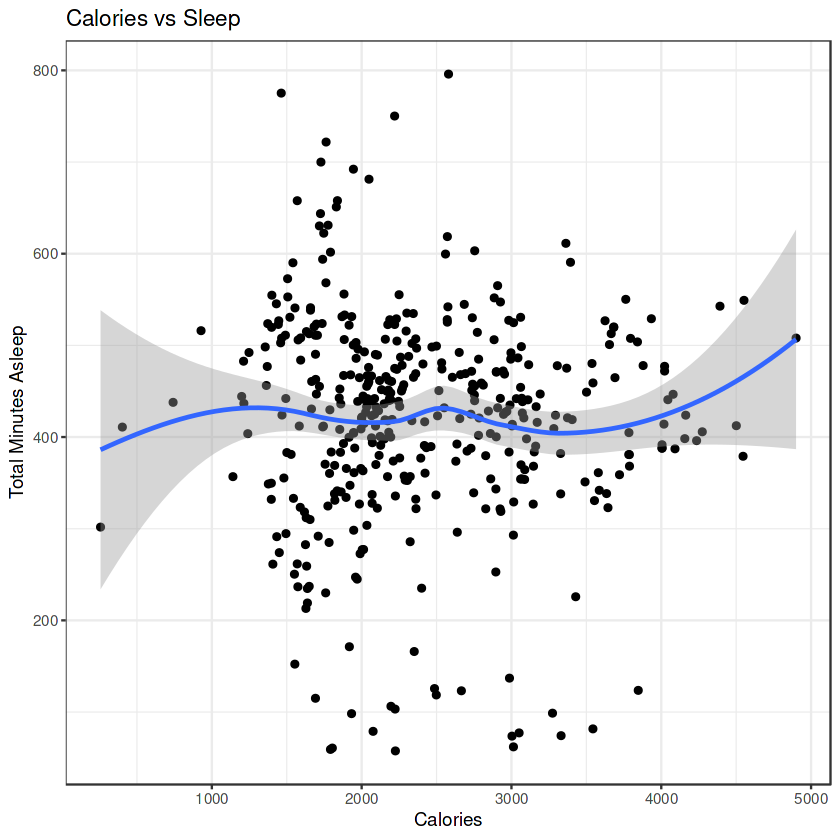

In [14]:
# The correlation between calories and asleep.
activity_sleep %>% drop_na() %>% 
  ggplot(aes(x = calories, y = totalminutesasleep)) +
  geom_jitter()+
  geom_smooth() +
  labs(title = "Calories vs Sleep",
       x = "Calories",
       y = "Total Minutes Asleep") +
  theme_bw()

This graph shows the positive correlation between calories and sleep time; the more calories burnt, the better the user’s sleep.

Then, I would like to see how active the users are during the week. 

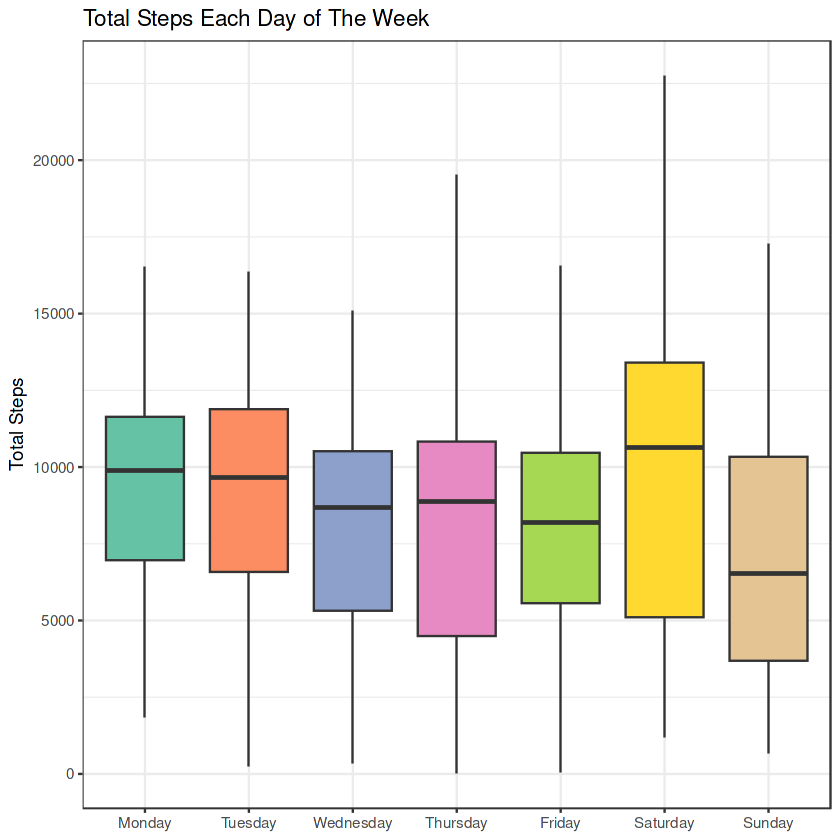

In [15]:
# Total steps the users take on each day of the week.
activity_sleep %>% 
  ggplot(aes(x = dayofweek, y = totalsteps, fill = dayofweek)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Total Steps Each Day of The Week",
       x = "Day",
       y = "Total Steps") +
  theme_bw() +
  theme(axis.title.x = element_blank(),
        legend.position = "none")

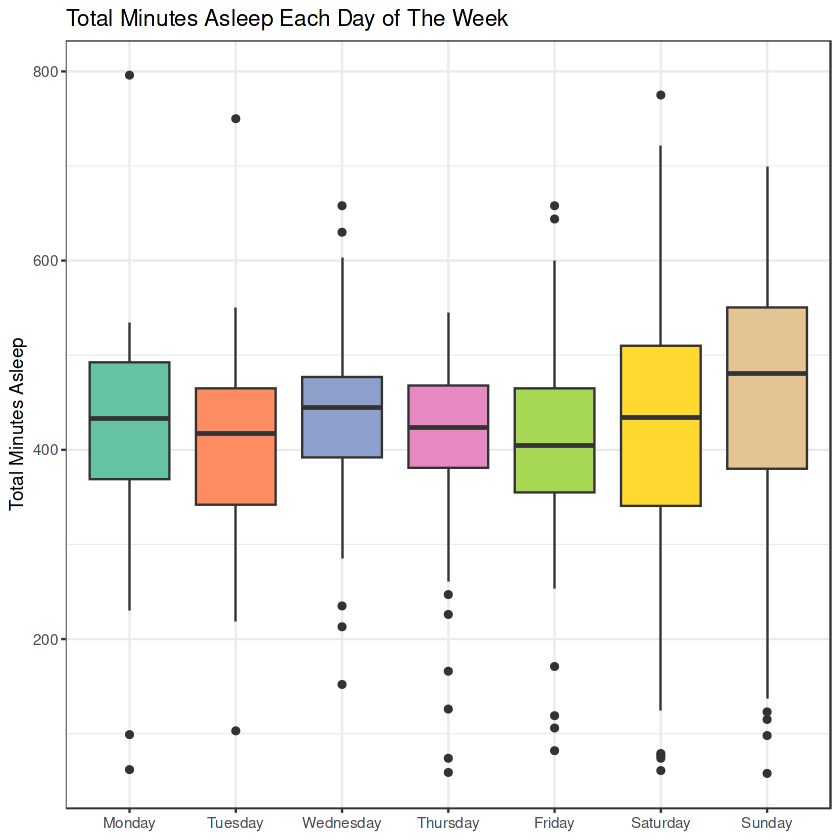

In [16]:
# How long the users sleep on each day of the week. 
activity_sleep %>% 
  ggplot(aes(x = dayofweek, y = totalminutesasleep, fill = dayofweek)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Total Minutes Asleep Each Day of The Week",
       x = "Day",
       y = "Total Minutes Asleep") +
  theme_bw() +
  theme(axis.title.x = element_blank(),
        legend.position = "none")

Additionally, I narrow the scope down to the hourly matrix to explore if there are any patterns during the day. I separate the data into 2 groups weekdays and weekends.

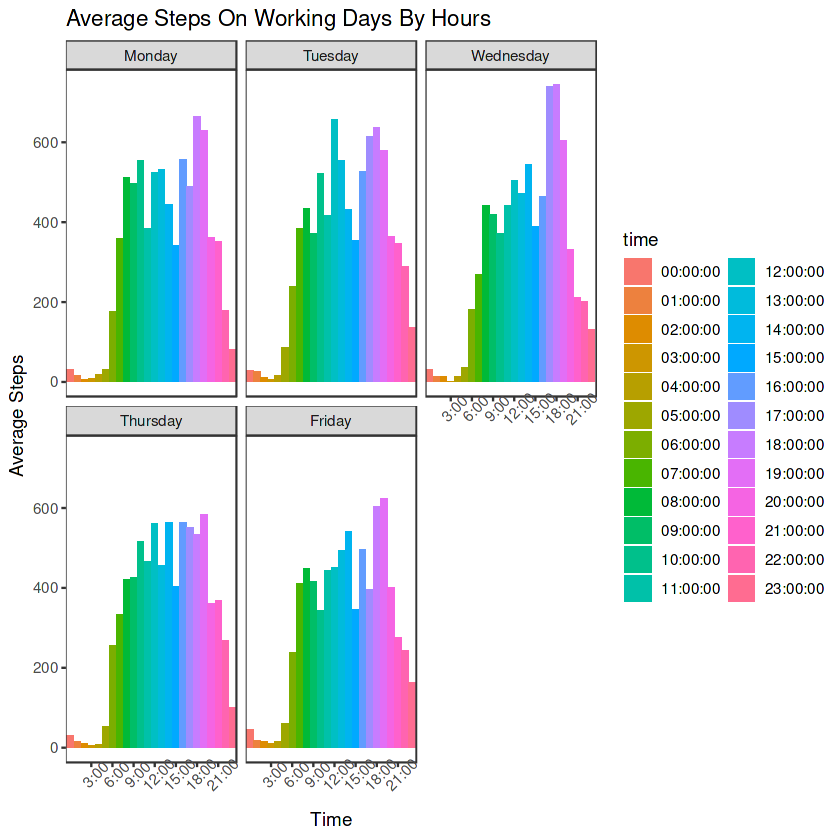

In [17]:
# Working Days
hourly_steps %>% 
  filter(dayofweek != "Saturday" & dayofweek != "Sunday") %>% 
  ggplot(aes(x = time, y = steptotal, fill = time)) +
  stat_summary(aes(x = time, y = steptotal), fun = "mean", geom = "bar") +
  facet_wrap(~dayofweek) +
  scale_x_discrete(breaks = c("03:00:00", "06:00:00", "09:00:00", "12:00:00", "15:00:00", "18:00:00","21:00:00"),
                   label = c("3:00", "6:00", "9:00", "12:00", "15:00", "18:00", "21:00")) +
  labs(title = "Average Steps On Working Days By Hours",
       x = "Time",
       y = "Average Steps") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.text.x=element_text(angle=45))

On working days, the users tend to be more active in the evening (after 4 pm). 

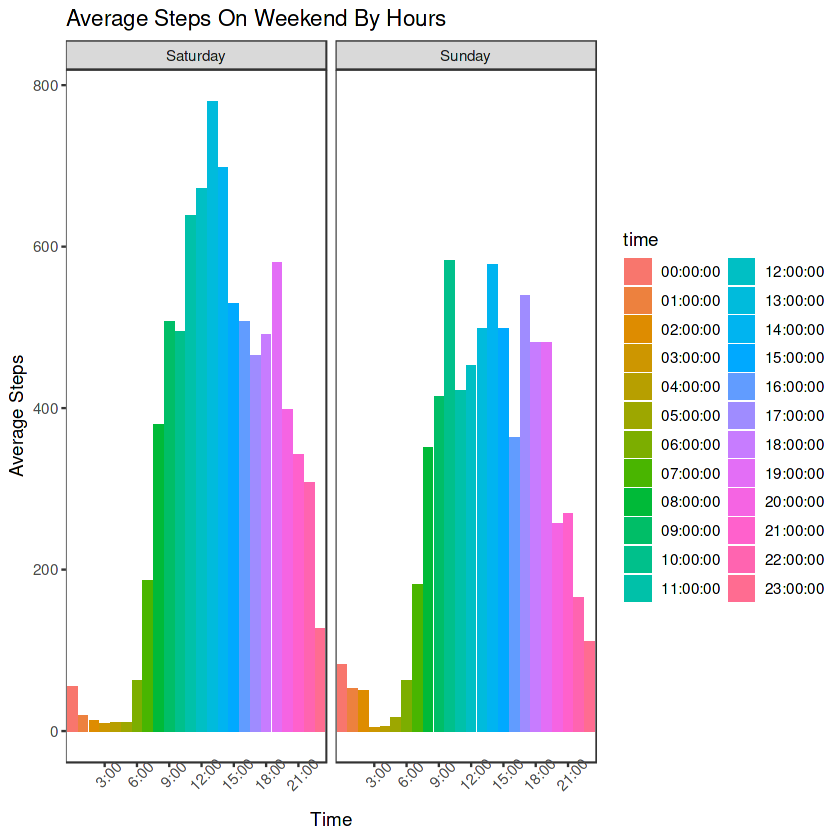

In [18]:
# Weekend
hourly_steps %>% 
  filter(dayofweek %in% c("Saturday", "Sunday")) %>% 
  ggplot(aes(x = time, y = steptotal, fill = time)) +
  geom_bar(position = "dodge", stat = "summary", fun = "mean") +
  facet_wrap(~dayofweek) +
  scale_x_discrete(breaks = c("03:00:00", "06:00:00", "09:00:00", "12:00:00", "15:00:00", "18:00:00","21:00:00"),
                   label = c("3:00", "6:00", "9:00", "12:00", "15:00", "18:00", "21:00")) +
  labs(title = "Average Steps On Weekend By Hours",
       x = "Time",
       y = "Average Steps") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.text.x=element_text(angle=45))

On the other hand, on the weekend, the users are more active in the morning (between 9 - 12), especially on Saturday.

## **Key Findings Summary**

1. The average daily steps are slightly less than the CDC recommends (at least 8,000 steps daily), about 4% lower. 
2. The average asleep time meets the minimum hours recommended by CDC (at least 7 hours).
3. The average sedentary minutes are approximately 16.5 hours per day. Even if we exclude the average asleep hours, the average sedentary hours are still high, almost 40% of the day.
4. The active time is different between weekdays and weekends as the users are more active in the evening on weekdays, but they are more active in the morning on weekends. Also, the most active day of the week is Saturday.

## **Recommendations**

**1. Customisation:**
It is more helpful if a user can set up the application/device based on their preferences. For example, allow a user to set their sleep schedule time or to set their exercise goal. So, they can understand their habits and stick to their personal health goals. However, the minimum of their goals/targets should be at least those that are recommended by CDC. If they do not set any personal goal, the application/device can use the CDC’s recommendations as default metrics. 

**2. Reminder features:** 
Reminding features can be used to send a notification to a user when they have spent too long on sedentary time as sometimes, they might not be aware of it, and this will remind them to be more active during the day. Also, when they continue doing any active activity. This will motivate them to keep going. 

**3. Encouragement:** 
It is more encouraging if there is a summary report at the end of each week, so users can see how they have improved during the week and how close they are to their goal. For those who are on diet, it will be helpful if it includes the prediction of how much weight they can lose if they continue doing what they have done each week. Also, it can include any tip/recommendation that helps them keep going on their journey.

**4. Marketing content:**
As the results show that there are some time periods when the users are more active than others, the marketing team can use this information as a guideline for when to release marketing content. For example, on Saturday morning, marketing content can be related to active activities or exercise content as it is the most active time and this content will give them a new idea to try to have more fun and be more active. 



 ## "Thank you. If you have any comment, please do not hesitate to let me know."